In [ ]:
import json
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC 

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

In [ ]:
data = pd.read_csv(f'PATH/implementation_sample_4.csv.gz',compression='gzip',lineterminator='\n');

In [ ]:
print(len(data[data["class"]=="human"])/7)
print(len(data.loc[0:60364,:]))

62515.28571428572
60365


In [ ]:
DS={}
human=data[data["class"]=="human"]
human.reset_index(drop=True,inplace=True)
for ds_index in range(1,8):
    DS["DS"+str(ds_index)]=pd.concat([data[data["class"]=="bot"],human.loc[60364*(ds_index-1):60364*ds_index-1,:]])
    DS["DS"+str(ds_index)]= DS["DS"+str(ds_index)].sample(frac=1).reset_index(drop=True)

In [ ]:
X={}
y={}
for ds_index in range(1,8):
  X["train"+str(ds_index)], X["test"+str(ds_index)], y["train"+str(ds_index)], y["test"+str(ds_index)] = train_test_split(DS["DS"+str(ds_index)].drop(['class'],axis=1), DS["DS"+str(ds_index)]['class'], test_size=0.1)

In [ ]:
classifer={}
for ds_index in range(1,8):
  classifer["RF"+str(ds_index)]=SVC()
  classifer["RF"+str(ds_index)].fit(X["train"+str(ds_index)], y["train"+str(ds_index)])

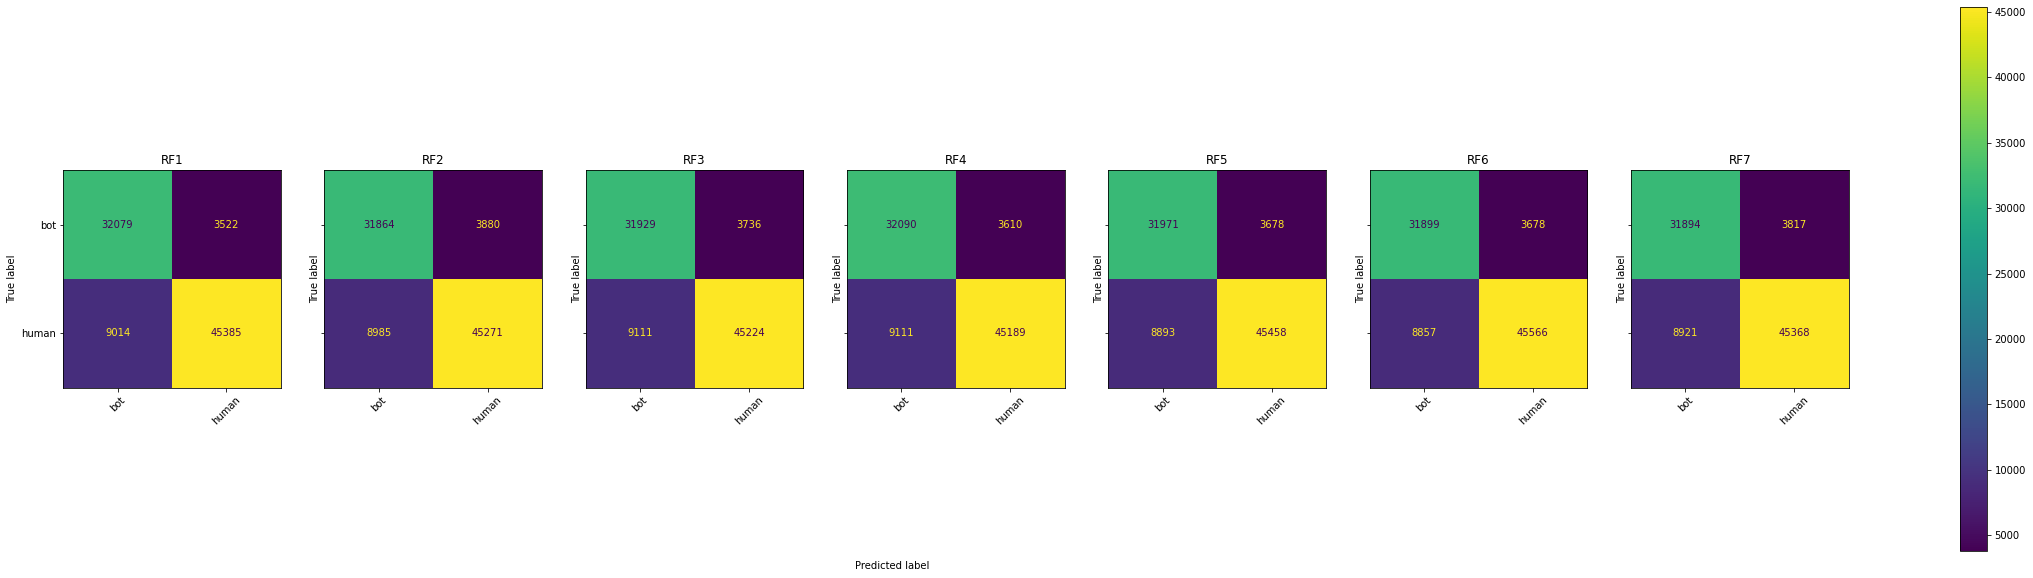

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.780644,0.901070,0.836545,35601,0.927986,0.834298,0.878652,54399,0.860711
1,RF2,0.780044,0.891450,0.832034,35744,0.921060,0.834396,0.875589,54256,0.857056
2,RF3,0.777997,0.895247,0.832514,35665,0.923693,0.832318,0.875628,54335,0.857256
3,RF4,0.778865,0.898880,0.834580,35700,0.926023,0.832210,0.876614,54300,0.858656
4,RF5,0.782376,0.896827,0.835701,35649,0.925147,0.836378,0.878526,54351,0.860322
5,RF6,0.782682,0.896619,0.835785,35577,0.925311,0.837256,0.879084,54423,0.860722
6,RF7,0.781428,0.893114,0.833547,35711,0.922395,0.835676,0.876897,54289,0.858467


In [ ]:
y_predict={}
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["train"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["train"+str(i+1)])
    cf_matrix = confusion_matrix(y["train"+str(i+1)], y_predict["train"+str(i+1)])
    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["train"+str(i+1)], y_predict["train"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

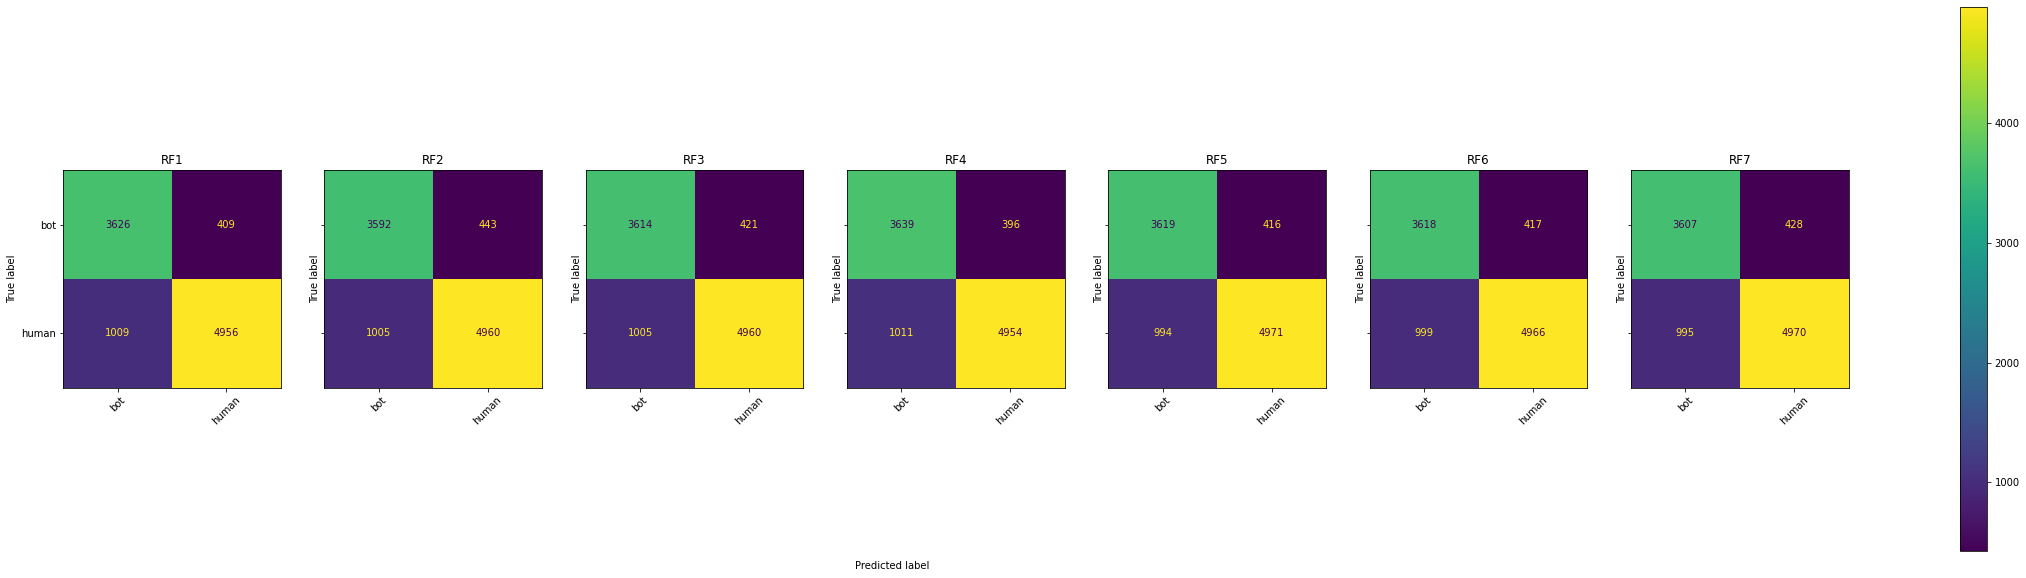

,DS,b-precision,b-recall,b-f1-score,b-total,h-precision,h-recall,h-f1-score,h-total,a-accuracy
0,RF1,0.782309,0.898637,0.836448,4035,0.923765,0.830847,0.874846,5965,0.8582
1,RF2,0.781379,0.890211,0.832252,4035,0.918009,0.831517,0.872625,5965,0.8552
2,RF3,0.782420,0.895663,0.835221,4035,0.921762,0.831517,0.874317,5965,0.8574
3,RF4,0.782581,0.901859,0.837997,4035,0.925981,0.830511,0.875652,5965,0.8593
4,RF5,0.784522,0.896902,0.836957,4035,0.922777,0.833361,0.875793,5965,0.8590
5,RF6,0.783626,0.896654,0.836338,4035,0.922534,0.832523,0.875220,5965,0.8584
6,RF7,0.783790,0.893928,0.835244,4035,0.920711,0.833194,0.874769,5965,0.8577


In [ ]:
f, axes = plt.subplots(1, 7, figsize=(40, 10), sharey='row')
classifer_accuracy_result=pd.DataFrame(columns=["DS","b-precision","b-recall","b-f1-score","b-total","h-precision","h-recall","h-f1-score","h-total","a-accuracy"])
for i, (key, clas_f) in enumerate(classifer.items()):
    y_predict["test"+str(i+1)] = classifer["RF"+str(i+1)].predict(X["test1"])
    cf_matrix = confusion_matrix(y["test1"], y_predict["test"+str(i+1)])

    disp = ConfusionMatrixDisplay(cf_matrix,display_labels=np.array(["bot","human"]))
    disp.plot(ax=axes[i], xticks_rotation=45)
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')

    classifer_accuracy_row=[key]
    for index_2,(key,value) in enumerate(classification_report(y["test1"], y_predict["test"+str(i+1)],output_dict=True).items()):
      if key in ["bot","human"]:
        classifer_accuracy_row.extend([*value.values()])
      elif key=="accuracy":
        classifer_accuracy_row.append(value)
    classifer_accuracy_result.loc[i]=classifer_accuracy_row

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.2, hspace=0.1)
f.colorbar(disp.im_, ax=axes)
plt.show()
classifer_accuracy_result.head(10)

In [ ]:
output_prediction=list()
for index,value in enumerate(y_predict["test1"]):
  if [y_predict["test1"][index],y_predict["test2"][index],y_predict["test3"][index],y_predict["test4"][index],y_predict["test5"][index],y_predict["test6"][index],y_predict["test7"][index]].count("bot")>3:
    output_prediction.append("bot")
  else:
    output_prediction.append("human")
output_prediction = np.array(output_prediction)

              precision    recall  f1-score   support

         bot       0.78      0.90      0.84      4035
       human       0.92      0.83      0.88      5965

    accuracy                           0.86     10000
   macro avg       0.85      0.86      0.86     10000
weighted avg       0.87      0.86      0.86     10000



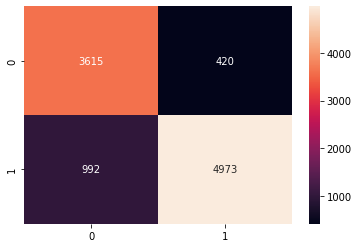

In [ ]:
print(classification_report(y["test1"], output_prediction))
cm = confusion_matrix(y["test1"], output_prediction)
sns.heatmap(cm, annot=True,fmt="d")